### **HW1 MY Heart Will Go On**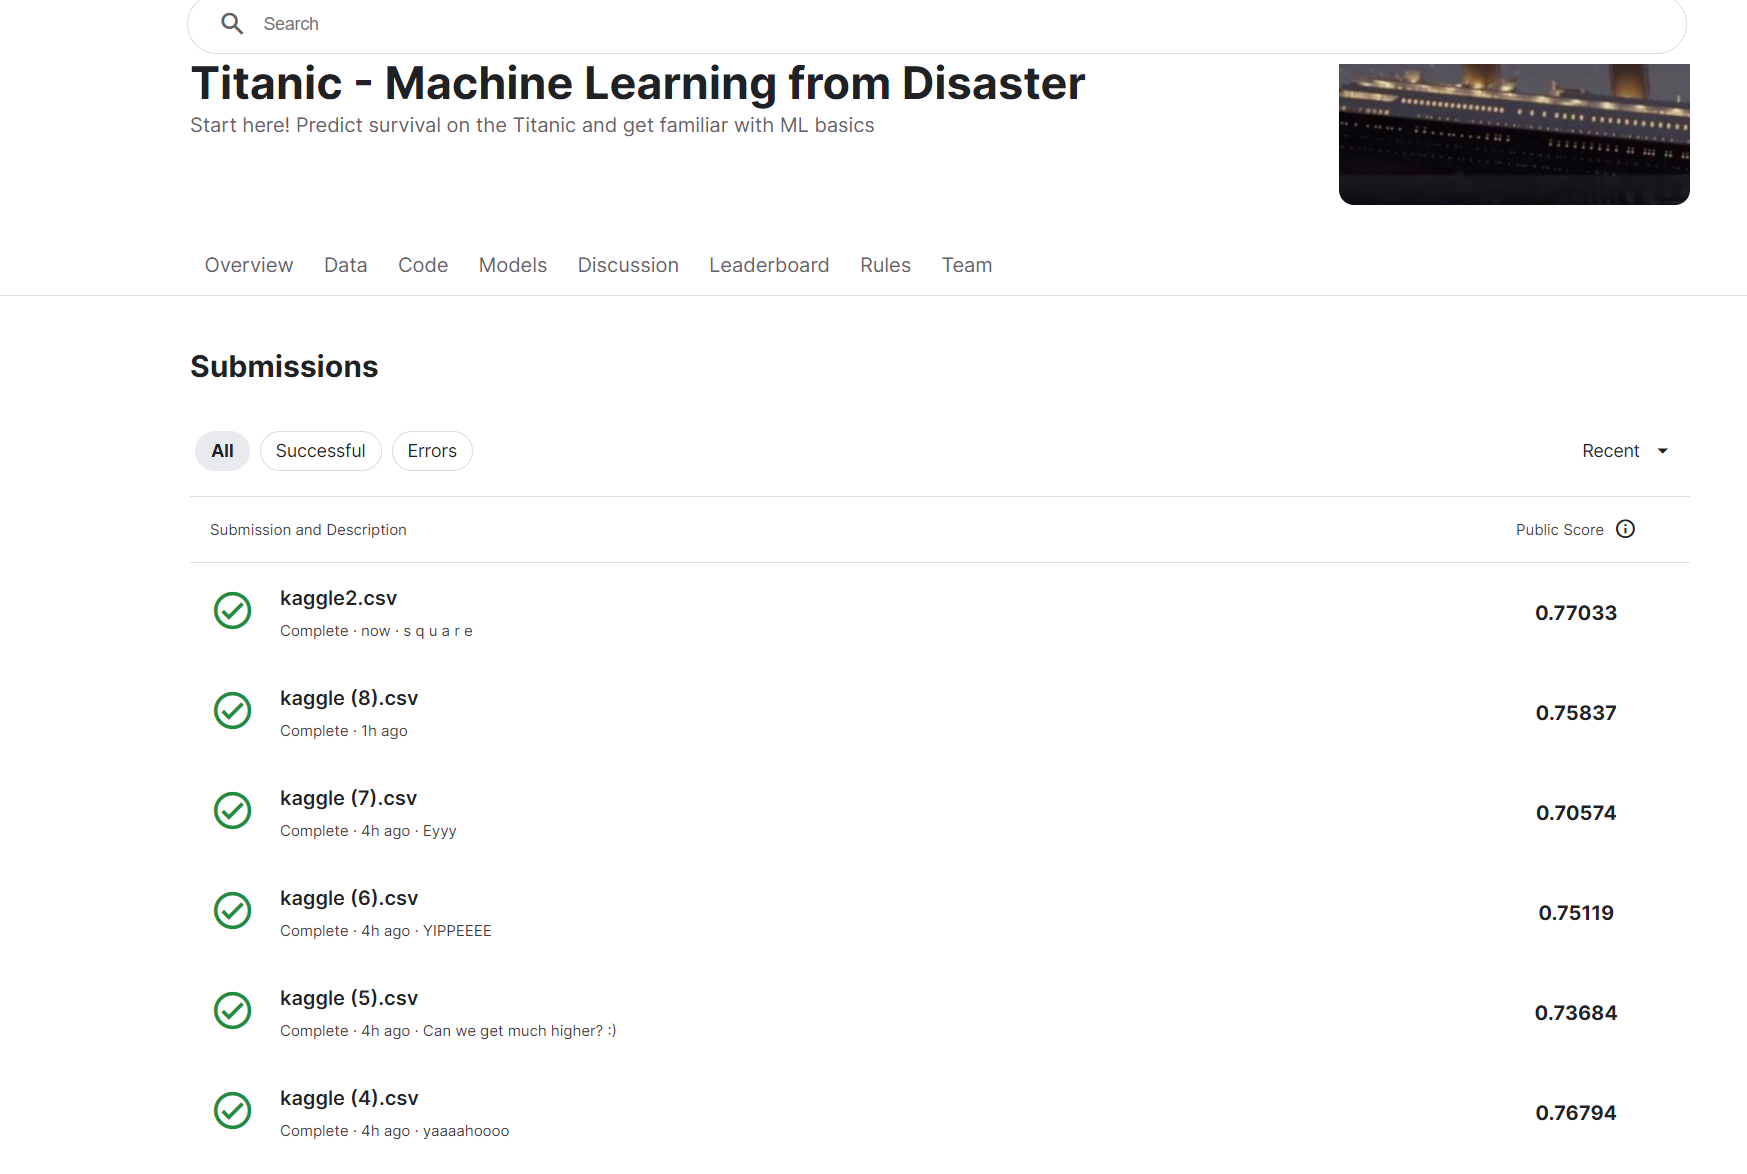

## **Importing all the necsessary library and get the data from El internet.**

Imported dataset.consists of many features including.

PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked.

but the dataset DO NOT contain Survived variable

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

np.set_printoptions(precision=4, suppress=True)

train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
dataset_train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
dataset_test = pd.read_csv(test_url) #test set

#CONFIG
num_iterations = 3000000


In [ ]:
#see first 5 data of the TRAIN set
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#see first 5 data of the TEST set
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
dataset_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Preprocess El Data to make El Data clean and useable for train.**
Define a Cleaner fn

In [ ]:
#all datatype with possible n/a :	SexS	#Age	#SibSp	#Parch	#Fare EmbarkedS
def clean_data(dataset):
  #find the measures of central tendency for each variables
  age_median = dataset["Age"].median()
  sibsp_median = dataset["SibSp"].median()
  parch_median = dataset["Parch"].median()
  fare_median = dataset["Fare"].median()
  sex_mode = dataset["Sex"].mode()[0] # funny word
  embarked_mode = dataset["Embarked"].mode()[0]

  #for T8 and T9
  print("The median of age is: ", dataset["Age"].median())
  print("The mode of age is: ", dataset["Age"].mode()[0])
  print("the mode of Embarked : " , embarked_mode)

  #replace the N/A value with its mode or median
  dataset["Age"] = dataset["Age"].fillna(age_median)
  dataset["SibSp"] = dataset["SibSp"].fillna(sibsp_median)
  dataset["Parch"] = dataset["Parch"].fillna(parch_median)
  dataset["Fare"] = dataset["Fare"].fillna(fare_median)
  dataset["Sex"] = dataset["Sex"].fillna(sex_mode)
  dataset["Embarked"] = dataset["Embarked"].fillna(embarked_mode)

  #baptized into number
  dataset.loc[dataset["Embarked"] == "S", "Embarked"] = 0
  dataset.loc[dataset["Embarked"] == "C", "Embarked"] = 1
  dataset.loc[dataset["Embarked"] == "Q", "Embarked"] = 2
  #baptized into number
  dataset.loc[dataset["Sex"] == "male", "Sex"] = 0
  dataset.loc[dataset["Sex"] == "female", "Sex"] = 1

  return dataset

#Call clean_data

### **T8. What is the median age of the training set?**
### **T9. What is the mode of Embarked? Fill the missing values with the mode.**


We will try to remove N/A and change los Datos from String --to->  **N U M B E R** so we can process and learn from them

Some Value are...hard to clean so I wont use it (Cabin)

**We will see that the N/A and string of the training set replace with mean or mode of its column feature**


In [ ]:
#Call cleandata
dataset_train = clean_data(dataset_train)

dataset_train.head()

The median of age is:  28.0
The mode of age is:  24.0
the mode of Embarked :  S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [ ]:
#we'll also clean the test data as well
dataset_test = clean_data(dataset_test)

dataset_test.head()

The median of age is:  27.0
The mode of age is:  21.0
the mode of Embarked :  S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


### **T10. Write a logistic regression classifier using gradient descent as learned in class.**
Use PClass, Sex, Age, and Embarked as input features.

I will try to write a linear equation for the prediction of "Survived" in the form of data matrix with Weight matrix and Data matrix, just like in the class's presentation where H(X) = WX.

Where...

W are weight vector

X are matrix of data

-row : data index.

-column : feature.

In [ ]:
def choose_feature(dataset,features):
  """
  select N features and create a np array for train/test.
  This method also add column of 1 in the first column to cumpute with bias weight.
  Param:
    dataset:your cleaned dataframe
    feature:your selected feature
  Return: trainable X matrix
  """
  #create a matrix of train data
  dataset = np.array(dataset[features].values, dtype = float)

  #add a bias term to the train column by concating it
  dataset_with_bias_col = np.c_[np.ones(dataset.shape[0]), dataset]


  print("Selected features: " , features)
  #print(dataset)
  #print("\n")
  return dataset_with_bias_col

def gen_starting_weight(seed,feature_count):
  """generate a weight for the N features with added bias term
    Params:
      - feature_count: is the Number of feature plus bias term
  """
  # Set a seed for reproducibility (optional)
  np.random.seed(seed)

  # Create a vector of weight with random values in the range from -10 to 10
  starting_weight = np.random.uniform(-10, 10, (feature_count))

  print("Starting weight metrix :", starting_weight)
  return starting_weight


def extract_y(dataset):
  """use to extract Survived column from data"""
  print("Y data extracted")
  return np.array(dataset["Survived"])

# Defining some more fuction for regression, this includes...

the sigmoid function to make the data stays between 0-1

the prediction fn

and some experimental things



In [ ]:
#the sigmoid fn for classification
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

#the hypothesis fn for prediction
def hypothesis(X,W):
    Y_pred = np.dot(X,W)
    Z = sigmoid(Y_pred)
    return Z

#the Y difference fn
def y_difference(X_train,Y_train,weight):
  y_diff_vec = Y_train - hypothesis(X_train,weight)
  return y_diff_vec

def learning_decay(currect_iteration, next_decay,decay_rate, learning_rate):
  if(currect_iteration%next_decay == 0):
    learning_rate *= decay_rate
  return learning_rate

#print(hypothesis(X_train,weight))

Finally the regression fuction

It iterates a lot of time to update the weight according to its loss fn (in this case we derived the fn from something from possibility perspective)

In [ ]:
def logistic_regression(X_train,Y_train,weight,learning_rate, num_iterations):

  for i in range(num_iterations):
    learning_rate = learning_decay(i, 10000,0.95, learning_rate)
    y_diff = y_difference(X_train,Y_train,weight)

    #update weight from loss according to learning rate
    loss = np.dot(y_diff, X_train)
    weight += learning_rate*(loss)

  #print(loss)
  print("The weight of each feature after Training: ", weight)
  return weight

### ** **STARTING OF T10 : MAKING A LOGISTIC REGRESSION MODEL** **

Initialize data and configs.

In [ ]:


#generating a clean features Matrix for training
X_train = choose_feature(dataset_train,["Pclass","Sex","Age","Embarked"])

#generating a clean features Matrix for testing
X_test = choose_feature(dataset_test,["Pclass","Sex","Age","Embarked"])

#generate the starting weight
weight = gen_starting_weight(420,X_train.shape[1])

#No y train because kaggle challenge and It's conventional I guess?
Y_train = extract_y(dataset_train)

print(X_train.shape)


Selected features:  ['Pclass', 'Sex', 'Age', 'Embarked']
Selected features:  ['Pclass', 'Sex', 'Age', 'Embarked']
Starting weight metrix : [-3.6871 -0.9394 -4.6604 -7.8214  7.3633]
Y data extracted
(891, 5)


Time to take a nap, the model is regressing...

In [ ]:
#It's regressin time
EL_WEIGHT = logistic_regression(X_train,Y_train,weight,1e-5,num_iterations)

The weight of each feature after Training:  [ 2.0714 -1.1963  2.5754 -0.0337  0.3209]


### **Testing the accuracy of the model**
After the regression ends it will return EL_WEIGHT which is the final wegiht of wour model.

Using the results of the trained weight we will predict and test out model


Recall from lecture 1...

Accuracy = (number of correct predictions) / (total number of predictions)

In [ ]:
def calculate_accuracy(x_train,y_train, final_weight,threshold):
  """Return the accuracy of the model with chosen threshold"""
  #The 'Possibility' of surviving from da Titanic from each data index
  result = hypothesis(x_train,final_weight)

  #classification result jaaaa
  class_result = (result > threshold).astype(int)

  #print(class_result)
  accuracy = np.sum(class_result == y_train)/y_train.shape

  print("The model's accuracy is:", accuracy)
  return accuracy

#For Uploading to Kaggle
def export_csv(dataframe_test,test_set, final_weight,csv_name,threshold):
  """Predict the outcome of Survived on the testset then Export to CSV"""
  test_res = hypothesis(test_set,final_weight)
  test_res = (test_res > threshold).astype(int)

  #convert np to kaggle dataframe format
  kaggle = pd.DataFrame(test_res, columns = ["Survived"])
  kaggle["PassengerId"] = dataframe_test["PassengerId"]

  kaggle.to_csv(f'/content/sample_data/{csv_name}.csv', index = False)
  print("model result is exported at: " + f'/content/sample_data/{csv_name}.csv')

In [ ]:
accuracy1 = calculate_accuracy(X_train, Y_train, EL_WEIGHT,0.5)

export_csv(dataset_test,X_test, EL_WEIGHT,"kaggle-4featlinear",0.5)

The model's accuracy is: [0.7901]
model result is exported at: /content/sample_data/kaggle-4featlinear.csv


### **T12. Try adding some higher oder features to training data**

Let's try adding SibSp and Parch AND SibSp**2 and Parch**2 as another feature shall we?



In [ ]:
#added SibSpSquared,ParchSquared to the dataframe
dataset_train['SibSpSquared'] = dataset_train['SibSp'] ** 2
dataset_train['ParchSquared'] = dataset_train['Parch'] ** 2
dataset_train['AgeMultPclass'] = dataset_train['Age'] * dataset_train['Pclass']
dataset_test['SibSpSquared'] = dataset_test['SibSp'] ** 2
dataset_test['ParchSquared'] = dataset_test['Parch'] ** 2
dataset_test['AgeMultPclass'] = dataset_test['Age'] * dataset_test['Pclass']

#generating a clean features Matrix for training and test
X_train2 = choose_feature(dataset_train,['Pclass', 'Sex', 'Age', 'Embarked','SibSp','Parch','SibSpSquared','ParchSquared','AgeMultPclass'])
X_test2 = choose_feature(dataset_test,['Pclass', 'Sex', 'Age', 'Embarked','SibSp','Parch','SibSpSquared','ParchSquared','AgeMultPclass'])

#generate the starting weight
weight2 = gen_starting_weight(42,X_train2.shape[1])

#print(X_train2)

Selected features:  ['Pclass', 'Sex', 'Age', 'Embarked', 'SibSp', 'Parch', 'SibSpSquared', 'ParchSquared', 'AgeMultPclass']
Selected features:  ['Pclass', 'Sex', 'Age', 'Embarked', 'SibSp', 'Parch', 'SibSpSquared', 'ParchSquared', 'AgeMultPclass']
Starting weight metrix : [-3.6871 -0.9394 -4.6604 -7.8214  7.3633  2.5946 -2.9496 -8.6492  2.527
  1.9732]


In [ ]:
#starts regression using the same lrate and iter as before
EL_WEIGHT2 = logistic_regression(X_train2,Y_train,weight2,1e-5,num_iterations)

The weight of each feature after Training:  [ 1.158  -0.7168  2.6523 -0.0125  0.2587  0.3282  0.4671 -0.2509 -0.1633
 -0.0122]


### **T12 accuracy on the training set?**
WELL... the models accuracy changes a bit

Depending on the feature selected to become high order(I've tried quite a few..)some of them Improve Acc but some Decreaes it

the best one i tried withwas with age**2 added with 77 percent on the TEST SET

 (Also an overflow warning occurs in the process...)


In [ ]:
print("Result of the NEW model: ")
accuracy2 = calculate_accuracy(X_train2, Y_train, EL_WEIGHT2,0.5)

export_csv(dataset_test,X_test2, EL_WEIGHT2,"kaggle-featQuad",0.5)

Result of the NEW model: 
The model's accuracy is: [0.8058]
model result is exported at: /content/sample_data/kaggle-featQuad.csv


### **T13. What happens if you reduce the amount of features to just Sex and Age?**

Let's see...
will start training the model again but this time we will only have 2 feature

In [ ]:
#generating a clean features Matrix for training and test
X_train3 = choose_feature(dataset_train,['Sex', 'Age'])
X_test3 = choose_feature(dataset_test,['Sex', 'Age'])

#generate the starting weight
weight3 = gen_starting_weight(420,X_train3.shape[1])

#print(X_train2)

Selected features:  ['Sex', 'Age']
Selected features:  ['Sex', 'Age']
Starting weight metrix : [-3.6871 -0.9394 -4.6604]


In [ ]:
#starts regression using the same lrate and iter as before
EL_WEIGHT3 = logistic_regression(X_train3,Y_train,weight3,1e-5,num_iterations)

The weight of each feature after Training:  [-1.3155  2.5053 -0.0047]


In [ ]:
print("Result of the SEX and AGE model: ")
accuracy3 = calculate_accuracy(X_train3, Y_train, EL_WEIGHT3,0.5)

export_csv(dataset_test,X_test3, EL_WEIGHT3,"kaggle-featQuad",0.5)

Result of the SEX and AGE model: 
The model's accuracy is: [0.7868]
model result is exported at: /content/sample_data/kaggle-featQuad.csv


To be honest when it is only Sex and Age the model's accuracy is still pretty good. The accurracy doesnt change that much.

Does this mean that these 2 features are very important to the survival rate? (Yes, probably)

### **OT3. Linear Regression Model**
We are creating a linear regression model. will have to change up some fn for determining the loss and also the hypothesis fn.
and something else in the code

In [ ]:
#the hypothesis fn for prediction
def LINEAR_hypothesis(X,W):
    Y_pred = np.dot(X,W)
    return Y_pred

def mean_square_error(X_train,Y_train,weight):
  mse = ((Y_train - LINEAR_hypothesis(X_train,weight))**2)/Y_train.shape
  return np.sum(mse)

#the Y difference fn
def LINEAR_ydiff(X_train,Y_train,weight):
  dy = (Y_train - LINEAR_hypothesis(X_train,weight))
  return dy

def linear_regression(X_train,Y_train,weight,learning_rate, num_iterations):

  for i in range(num_iterations):
    learning_rate = learning_decay(i, 10000,0.95, learning_rate)

    y_diff = LINEAR_ydiff(X_train,Y_train,weight)
    dl = np.dot(y_diff, X_train)
    #update weight from loss according to learning rate
    weight += learning_rate*(dl)
    #if(i%10000 == 0):
    #  print(dl)
    #  sum_mse = mean_square_error(X_train,Y_train,weight)
    #  print(f"{i} Iter's MSE : {sum_mse}")

  #print(loss)
  print("The weight of each feature after Training: ", weight)
  return weight

In [ ]:
def LINEAR_calculate_accuracy(LINEAR_x_train,LINEAR_y_train, LINEAR_final_weight,threshold):
  """Return the accuracy of the model with chosen threshold"""
  #The 'Possibility' of surviving from da Titanic from each data index
  result = LINEAR_hypothesis(LINEAR_x_train,LINEAR_final_weight)
  #print(result)

  #classification result jaaaa
  class_result = (result > threshold).astype(int)
  print(class_result)

  #print(class_result)
  accuracy = np.sum(class_result == LINEAR_y_train)/LINEAR_y_train.shape

  print("The model's accuracy is:", accuracy)
  return accuracy

#For Uploading to Kaggle
def LINEAR_export_csv(LINEAR_dataframe_test,LINEAR_test_set, LINEAR_final_weight,csv_name,threshold):
  """Predict the outcome of Survived on the testset then Export to CSV"""
  test_res = LINEAR_hypothesis(LINEAR_test_set,LINEAR_final_weight)
  test_res = (test_res > threshold).astype(int)

  #convert np to kaggle dataframe format
  kaggle = pd.DataFrame(test_res, columns = ["Survived"])
  kaggle["PassengerId"] = LINEAR_dataframe_test["PassengerId"]

  kaggle.to_csv(f'/content/sample_data/{csv_name}.csv', index = False)
  print("model result is exported at: " + f'/content/sample_data/{csv_name}.csv')

Starting the linear regression

In [ ]:

#generating a clean features Matrix for training
X_train_linear = choose_feature(dataset_train,["Pclass","Sex","Age","Embarked"])

#generating a clean features Matrix for testing
X_test_linear = choose_feature(dataset_test,["Pclass","Sex","Age","Embarked"])

#generate the starting weight
linear_weight = gen_starting_weight(420,X_train_linear.shape[1])

#No y train because kaggle challenge and It's conventional I guess?
Y_train_linear = extract_y(dataset_train)


Selected features:  ['Pclass', 'Sex', 'Age', 'Embarked']
Selected features:  ['Pclass', 'Sex', 'Age', 'Embarked']
Starting weight metrix : [-3.6871 -0.9394 -4.6604 -7.8214  7.3633]
Y data extracted


In [ ]:
LINEAR_W = linear_regression(X_train_linear,Y_train_linear,linear_weight,1e-6,1000000)

The weight of each feature after Training:  [ 0.7733 -0.1877  0.4914 -0.005   0.0492]


In [ ]:
#print("Result of the LINEAR model: ")
accuracy_linear = LINEAR_calculate_accuracy(X_train_linear, Y_train_linear, LINEAR_W,0.5)

export_csv(dataset_test,X_test_linear, LINEAR_W,"kaggle-LINEAR",0.5)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 

The results of test dataset reduced dramatically

### **OT4. TRYING MATRIX INVERSION**
Following the proof from the lecture we derived a way to calculate the weight metrix as below....

In [ ]:
#generating a clean features Matrix for training
Xtr = choose_feature(dataset_train,["Pclass","Sex","Age","Embarked"])

#generating a clean features Matrix for testing
Xts = choose_feature(dataset_test,["Pclass","Sex","Age","Embarked"])

#generate the starting weight
#linear_weight = gen_starting_weight(420,X_train_linear.shape[1])

#No y train because kaggle challenge and It's conventional I guess?
Ytr = extract_y(dataset_train)

Selected features:  ['Pclass', 'Sex', 'Age', 'Embarked']
Selected features:  ['Pclass', 'Sex', 'Age', 'Embarked']
Y data extracted


In [ ]:
Xtr_T = Xtr.T
INVERSE_TERM = np.linalg.inv(np.dot(Xtr_T,Xtr))

MATRIX_WEIGHT = np.dot(INVERSE_TERM,np.dot(Xtr_T,Ytr))

LINEAR_calculate_accuracy(Xtr,Ytr, MATRIX_WEIGHT,0.5)

print("The weight from LINEAR Reg. Is : ",LINEAR_W)
print("The weight from MATRIX Deriv. Is : ",MATRIX_WEIGHT)

print("The LINEAR's MSE: ", mean_square_error(X_train,Y_train,LINEAR_W))
print("The MATRIX's MSE: ", mean_square_error(X_train,Y_train,MATRIX_WEIGHT))

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 

After the calculation the weight and the MSE from both methods seems very close to each other (As it's suppose to (very nice))


### **DONE... PLEASE GIVE ME FULL SCORE PLZ**